In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

<h1 style="text-align:center">Clase: Extracción básica de características. División en frames de tiempo corto </h1>
<h3 style="text-align:center">ACUS340: Procesamiento digital de señales</h3>
<p style="text-align:center">Dr. Víctor Poblete <br>
<a href="mailto:vpoblete@uach.cl">vpoblete@uach.cl</a><br>
<a href="https://github.com/vpobleteacustica/ACUS340-Analisis-de-senales-en-Acustica-y-Vibraciones">https://github.com/vpobleteacustica/ACUS340-Analisis-de-senales-en-Acustica-y-Vibraciones</a><br> 
<p style="text-align:center">Diego Espejo Alquinta - Ayudante <br>
<a href="mailto:diego.espejo@alumnos.uach.cl">diego.espejo@alumnos.uach.cl </a><br>
<a href="http://www.acusticauach.cl">www.acusticauach.cl</a><br> 

> + Es interesante ver la señal de audio en tres dimensiones: https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d

In [52]:
from __future__ import print_function
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import EngFormatter

import scipy.io.wavfile as wavfile
import scipy
from scipy.signal import convolve
import scipy.fftpack
from scipy.fft import fft, ifft, fftfreq
from scipy.fftpack import rfft, irfft
import IPython.display as ipd
import math

In [107]:
def TF(s, fs):
    N = s.shape[0]
    Ni = int(N/2)
    secs = N / float(fs)
    Ts = 1.0/fs                                         # sampling interval in time
    t = np.arange(0, secs, Ts)                          # time vector as scipy arange field / numpy.ndarray
    S = fft(s)
    S_mag = abs(fft(s))
    S_side = S[range(Ni)]                               # one side FFT range
    freqs = scipy.fftpack.fftfreq(s.size, t[1]-t[0])
    fft_freqs = np.array(freqs)
    freqs_side = freqs[range(Ni)]                       # one side frequency range
    fft_freqs_side = np.array(freqs_side)
    return (S)

def TF2(s, fs):
    N = s.shape[0]
    Ni = int(N/2)
    secs = N / float(fs)
    Ts = 1.0/fs                                         # sampling interval in time
    t = np.arange(0, secs, Ts)                          # time vector as scipy arange field / numpy.ndarray
    S = fft(s)
    S_mag = abs(fft(s))
    S_side = S[range(Ni)]                               # one side FFT range
    freqs = scipy.fftpack.fftfreq(s.size, t[1]-t[0])
    fft_freqs = np.array(freqs)
    freqs_side = freqs[range(Ni)]                       # one side frequency range
    fft_freqs_side = np.array(freqs_side)
    return (freqs_side, S_side)

In [4]:
sampleRate = 44100
frequency = 25
length = 5

t = np.linspace(0, length, sampleRate * length)  #  Produces a 5 second Audio-File
y = np.sin(frequency * 2 * np.pi * t)            #  Has frequency of 440Hz

wavfile.write('Sine_25Hz.wav', sampleRate, y)

In [6]:
s25_filename = 'Sine_25Hz.wav' #'Lore_mary_had.wav'
s440_filename = 'Sine_440Hz.wav' #'Lore_mary_had.wav'
s1000_filename = 'Sine_1000Hz.wav' #'Lore_mary_had.wav'

fs , s25 = scipy.io.wavfile.read(s25_filename)
fs , s440 = scipy.io.wavfile.read(s440_filename)
fs , s1000 = scipy.io.wavfile.read(s1000_filename)

s25 = s25/max(s25)
s440 = s440/max(s440)
s1000 = s1000/max(s1000)

s25_duration = len(s25)/fs
s440_duration = len(s440)/fs
s1000_duration = len(s1000)/fs

s25_time = np.arange(0,s25_duration,1/fs) #time vector
s440_time = np.arange(0,s440_duration,1/fs) #time vector
s1000_time = np.arange(0,s1000_duration,1/fs) #time vector


In [7]:
print(fs)

44100


<IPython.core.display.Javascript object>


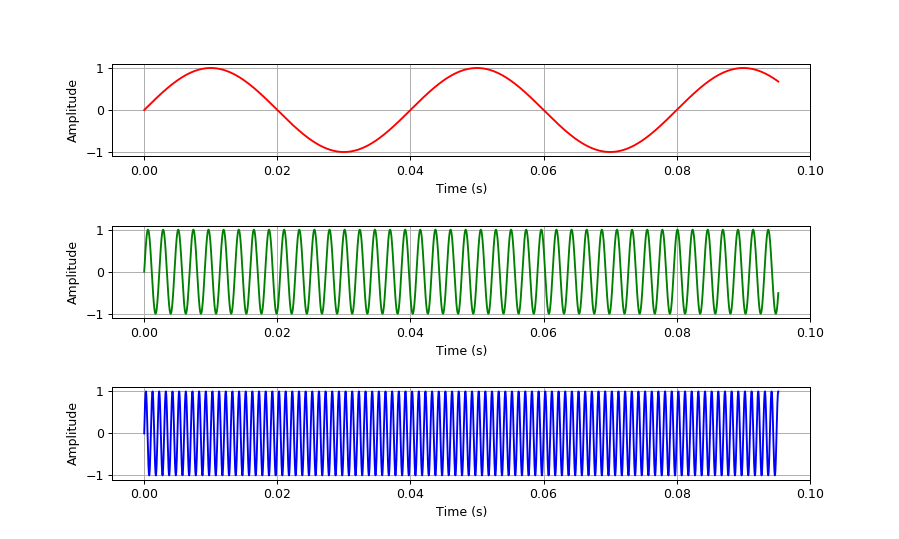

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 6)) # se hace la division de figuras en ax1 y ax2 en dos filas y una columna
#se separan ambos graficos para que no se sobrepongan
fig.subplots_adjust(hspace=0.75)

#figura 1, ax1
ax1.plot(s25_time[0:4202], s25[0:4202], "r") # plotting the positive fft spectrum
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid()

#figura 2, ax2
ax2.plot(s440_time[0:4202], s440[0:4202], "g") # plotting the positive fft spectrum
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude')
ax2.grid()

#figura 3, ax3
ax3.plot(s1000_time[0:4202], s1000[0:4202], "b") # plotting the positive fft spectrum
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Amplitude')
ax3.grid()

plt.rcParams.update({'font.size': 14})

In [9]:
ipd.Audio(s1000, rate = fs)

In [ ]:
ipd.Audio(yc, rate = fs)

In [11]:
ts25, freqss25, freqs_sides25, S25, S_mag25, S_side25             = TF(s25, fs)
ts440, freqss440, freqs_sides440, S440, S_mag440, S_side440       = TF(s440, fs)
ts1000, freqss1000, freqs_sides1000, S1000, S_mag1000, S_side1000 = TF(s1000, fs)

In [12]:
S_side25    = abs(S_side25)/max(S_side25)
S_side440   = abs(S_side440)/max(S_side440)
S_side1000  = abs(S_side1000)/max(S_side1000)

<IPython.core.display.Javascript object>


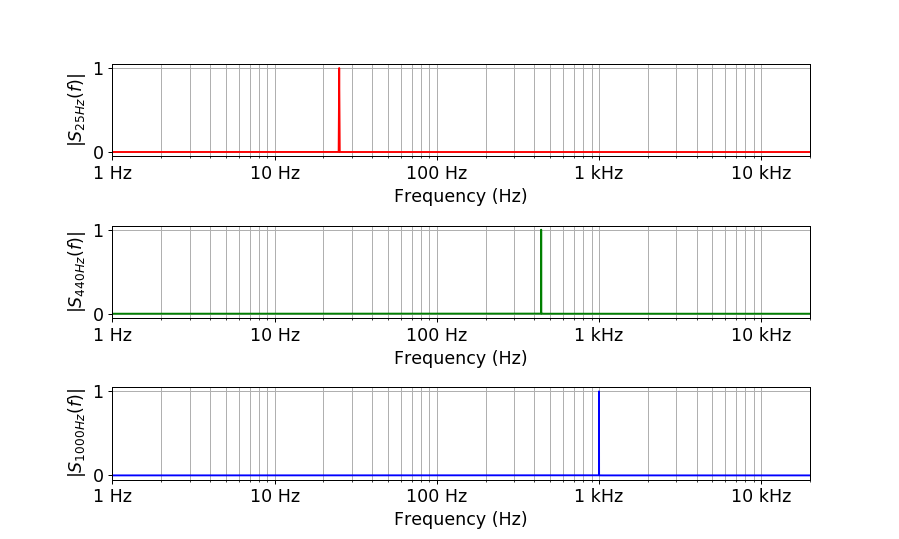

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 6)) 
fig.subplots_adjust(hspace=0.75)

#figura 1, ax1
ax1.plot(freqs_sides25, abs(S_side25), "r") # plotting the positive fft spectrum
ax1.set_xscale('log')
ax1.axis([1, 20000, -0.05, 1.05])
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('$|S_{25Hz}(f)|$')
ax1.grid(True, which="both", ls="-")
plt.rcParams.update({'font.size': 14})
# Se define para valores en Hz inmediatamente con este formato predefinido
ax1.xaxis.set_major_formatter(EngFormatter(unit='Hz'))

#figura 2, ax2
ax2.plot(freqs_sides440, abs(S_side440), "g") # plotting the positive fft spectrum
ax2.set_xscale('log')
ax2.axis([1, 20000, -0.05, 1.05])
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('$|S_{440Hz}(f)|$')
ax2.grid(True, which="both", ls="-")
plt.rcParams.update({'font.size': 14})
# Se define para valores en Hz inmediatamente con este formato predefinido
ax2.xaxis.set_major_formatter(EngFormatter(unit='Hz'))

#figura 3, ax3
ax3.plot(freqs_sides1000, abs(S_side1000), "b") # plotting the positive fft spectrum
ax3.set_xscale('log')
ax3.axis([1, 20000, -0.05, 1.05])
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('$|S_{1000Hz}(f)|$')
ax3.grid(True, which="both", ls="-")
plt.rcParams.update({'font.size': 14})
# Se define para valores en Hz inmediatamente con este formato predefinido
ax3.xaxis.set_major_formatter(EngFormatter(unit='Hz'))

In [49]:
slore_filename = 'Lore_mary_had.wav'
fs , slore = scipy.io.wavfile.read(slore_filename)
slore = slore/max(slore)
slore_duration = len(slore)/fs
slore_time = np.arange(0,slore_duration,1/fs) #time vector

<IPython.core.display.Javascript object>


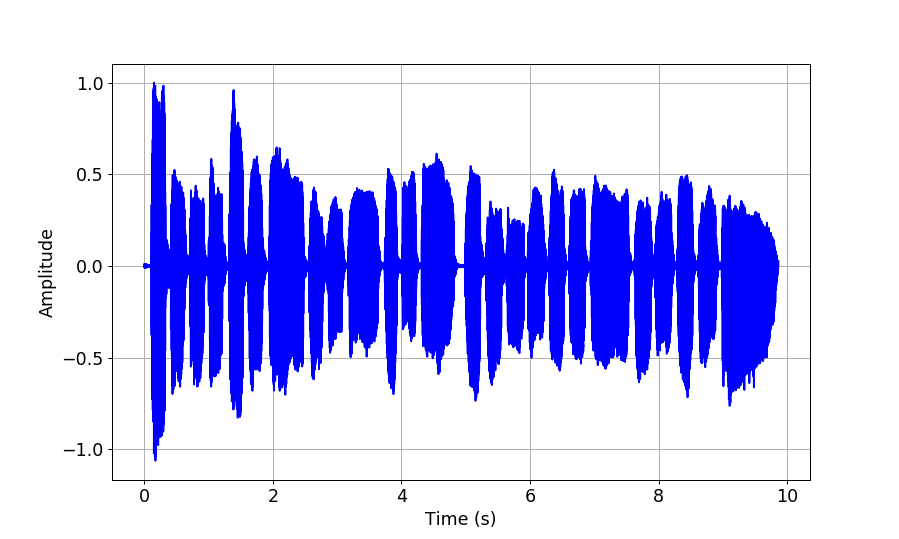

In [28]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6)) # se hace la division de figuras en ax1 y ax2 en dos filas y una columna
#se separan ambos graficos para que no se sobrepongan
fig.subplots_adjust(hspace=0.75)

#figura 1, ax1
ax1.plot(slore_time, slore, "b") 
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid()

In [16]:
tslore, freqsslore, freqs_sideslore, Sslore, S_magslore, S_sideslore = TF(slore, fs)

In [17]:
S_sideslore    = abs(S_sideslore)/max(S_sideslore)

<IPython.core.display.Javascript object>


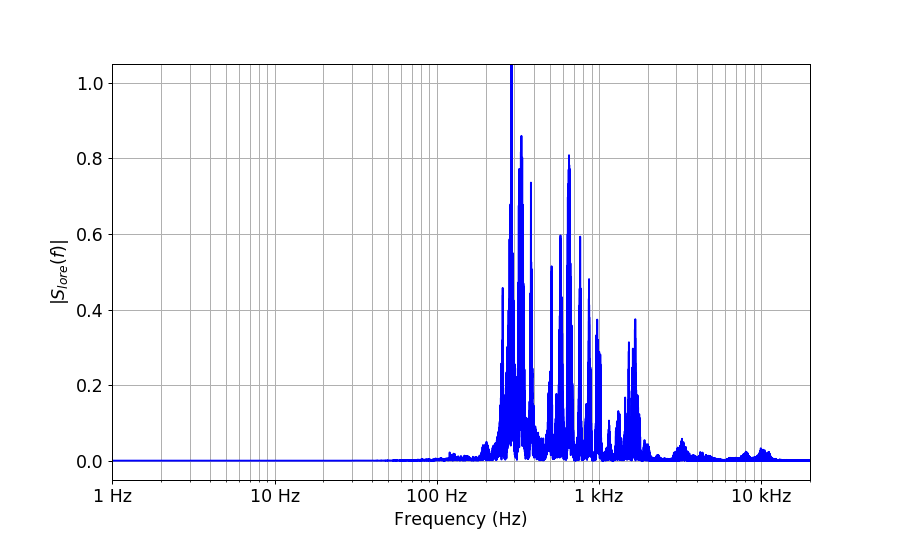

In [18]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6)) 
fig.subplots_adjust(hspace=0.75)

#figura 1, ax1
ax1.plot(freqs_sideslore, abs(S_sideslore), "b") # plotting the positive fft spectrum
ax1.set_xscale('log')
ax1.axis([1, 20000, -0.05, 1.05])
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('$|S_{lore}(f)|$')
ax1.grid(True, which="both", ls="-")
plt.rcParams.update({'font.size': 14})
# Se define para valores en Hz inmediatamente con este formato predefinido
ax1.xaxis.set_major_formatter(EngFormatter(unit='Hz'))

In [54]:
winlength   = 2048
overlap     = 0.5
nhops       = math.floor((len(slore) - overlap*winlength)/(winlength-overlap*winlength)) 
print(nhops)

423


In [55]:
slore_mat   = np.zeros([nhops,winlength])
hop         = int(winlength*(1-overlap)) #Salto de frame según overlap
for idx in range(nhops):
    j = hop*idx
    fila = []
    fila.append(slore[j:j+winlength])
    slore_mat[idx] = fila[0]

In [75]:
print(slore_mat[1].shape[0])

2048


<IPython.core.display.Javascript object>


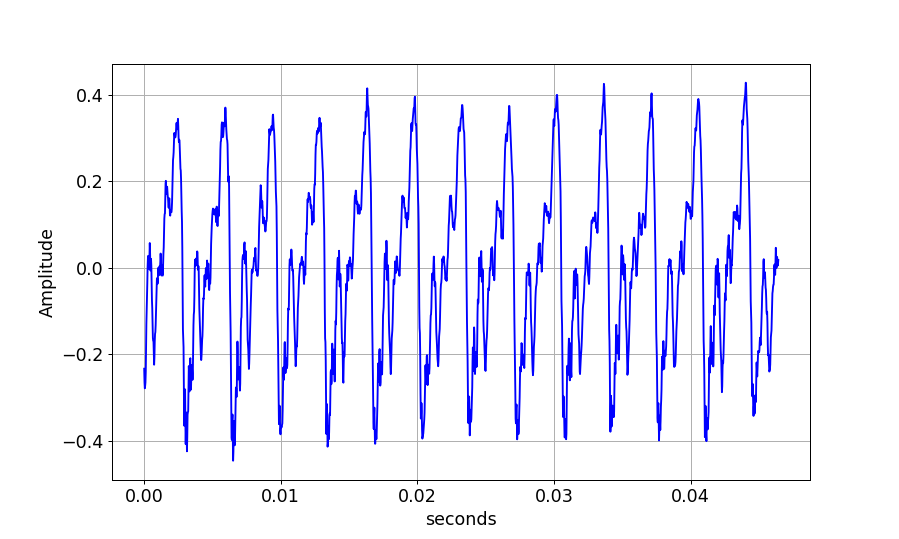

In [82]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6)) 
#se separan ambos graficos para que no se sobrepongan
fig.subplots_adjust(hspace=0.75)

#figura 1, ax1

frame_duration = slore_mat[1].shape[0]/fs
frame_time = np.arange(0,frame_duration,1/fs) #time vector

num_frame = 260
ax1.plot(frame_time, slore_mat[num_frame,:], "b") 
ax1.set_xlabel('seconds')
ax1.set_ylabel('Amplitude')
ax1.grid()

In [83]:
E = []
for idx in range(nhops): 
    fila_sum = 0
    for n in range(winlength):
        fila_sum = ((slore_mat[idx][n])**2)+fila_sum
        if n==winlength-1:
            E.append(fila_sum/winlength)
E    = E/(np.max(E))

In [85]:
time = np.linspace(0,len(slore)/fs, nhops)

<IPython.core.display.Javascript object>


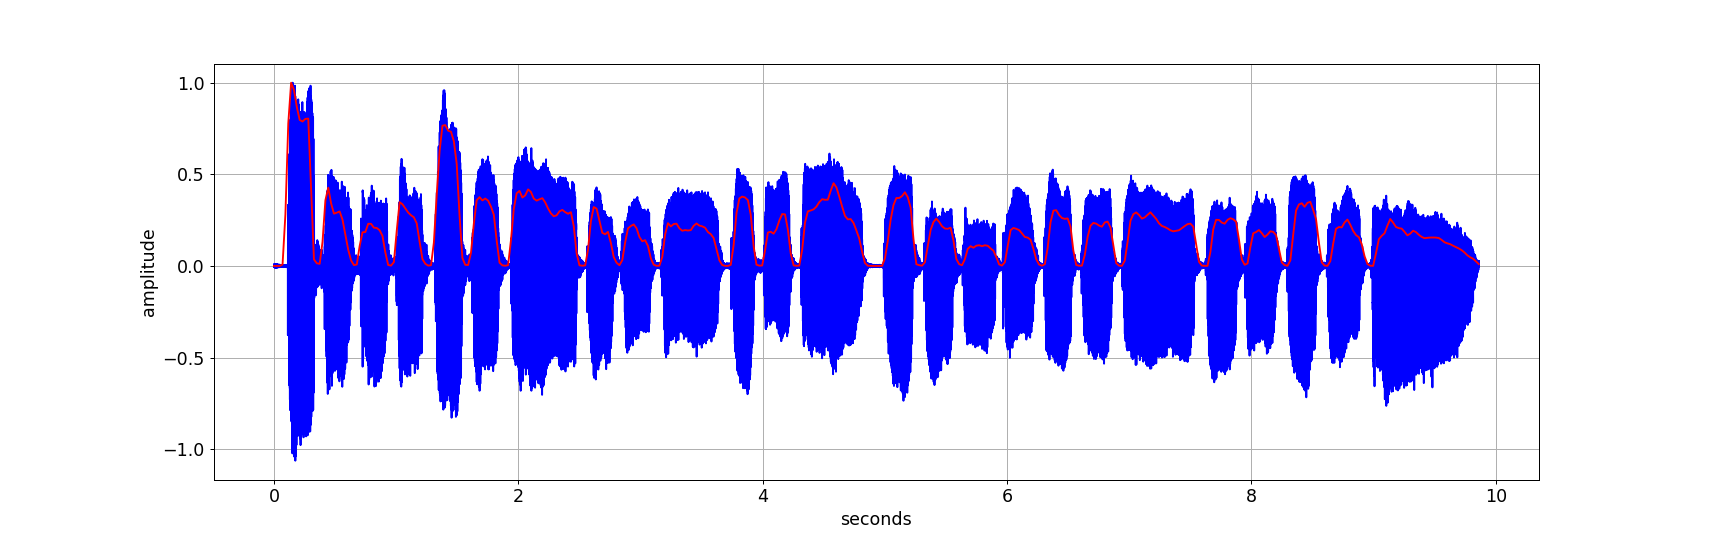

In [91]:
fig, (ax1) = plt.subplots(1, 1, figsize=(19, 6)) 
#se separan ambos graficos para que no se sobrepongan
fig.subplots_adjust(hspace=0.75)

#figura 1, ax1
ax1.plot(slore_time, slore, "b") 
ax1.plot(time, E, "r") 
ax1.set_xlabel('seconds')
ax1.set_ylabel('amplitude')
ax1.grid()

In [92]:
Hanningwindow    = np.zeros([1,winlength])
Hanningwindow[0] = np.hanning(winlength)
Hanningwindow    = np.repeat(Hanningwindow,[nhops],axis=0)

In [93]:
print(Hanningwindow.shape)

(423, 2048)


<IPython.core.display.Javascript object>


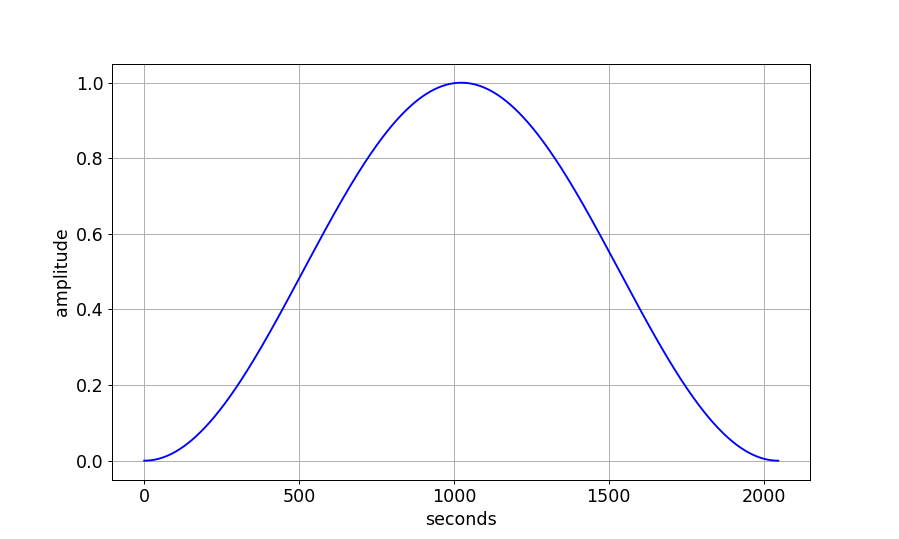

In [96]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6)) 
#se separan ambos graficos para que no se sobrepongan
fig.subplots_adjust(hspace=0.75)

#figura 1, ax1
ax1.plot(Hanningwindow[10,:], "b") 

ax1.set_xlabel('seconds')
ax1.set_ylabel('amplitude')
ax1.grid()

In [99]:
slore_mat_hanning = slore_mat*Hanningwindow

<IPython.core.display.Javascript object>


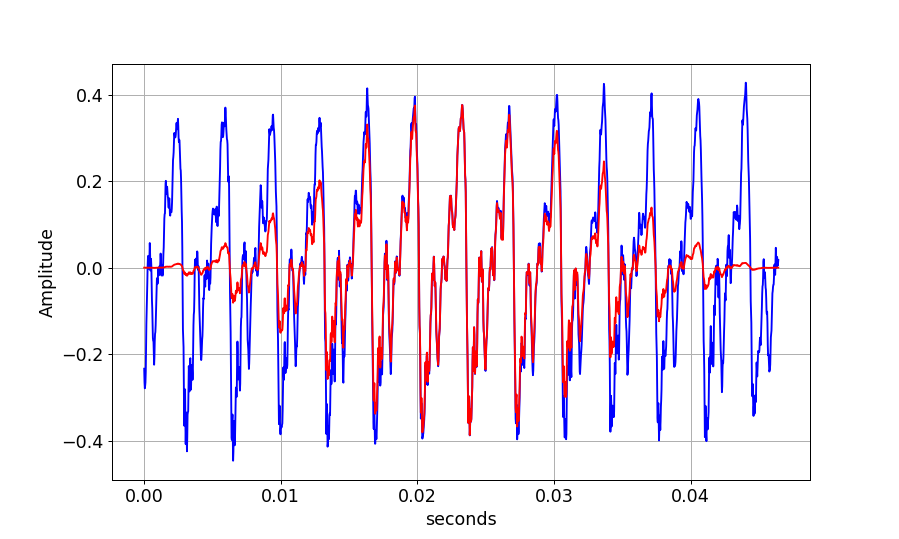

In [102]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6)) 
#se separan ambos graficos para que no se sobrepongan
fig.subplots_adjust(hspace=0.75)

#figura 1, ax1

frame_duration = slore_mat[1].shape[0]/fs
frame_time = np.arange(0,frame_duration,1/fs) #time vector

num_frame = 260
ax1.plot(frame_time, slore_mat[num_frame,:], "b")
ax1.plot(frame_time, slore_mat_hanning[num_frame,:], "r")
ax1.set_xlabel('seconds')
ax1.set_ylabel('Amplitude')
ax1.grid()

In [104]:
Slore_mat         = np.zeros([winlength, nhops], dtype = "complex_")
slore_mat_hanning = np.transpose(slore_mat_hanning)

In [105]:
print(slore_mat_hanning.shape)

(2048, 423)


In [109]:
Slore_mat_side  = np.zeros([int(winlength/2), nhops], dtype = "complex_")
freqs_side      = np.zeros([int(winlength/2), nhops], dtype = "complex_")

for k in range(0, nhops):
    Slore_mat[:,k] = TF(slore_mat_hanning[:,k], fs)
    
for l in range(0, nhops):
    freqs_side[:,l], Slore_mat_side[:,l] = TF2(slore_mat_hanning[:,l], fs)

In [110]:
MagSlore_mat  = np.abs(Slore_mat)
MagSlore_mat2 = np.power(MagSlore_mat,2) 

magSlore_mat_side  = np.abs(Slore_mat_side)
mag2Slore_mat_side = np.power(magSlore_mat_side,2)

In [113]:
print(freqs_side.shape, Slore_mat_side.shape, mag2Slore_mat_side.shape)

(1024, 423) (1024, 423) (1024, 423)


<IPython.core.display.Javascript object>


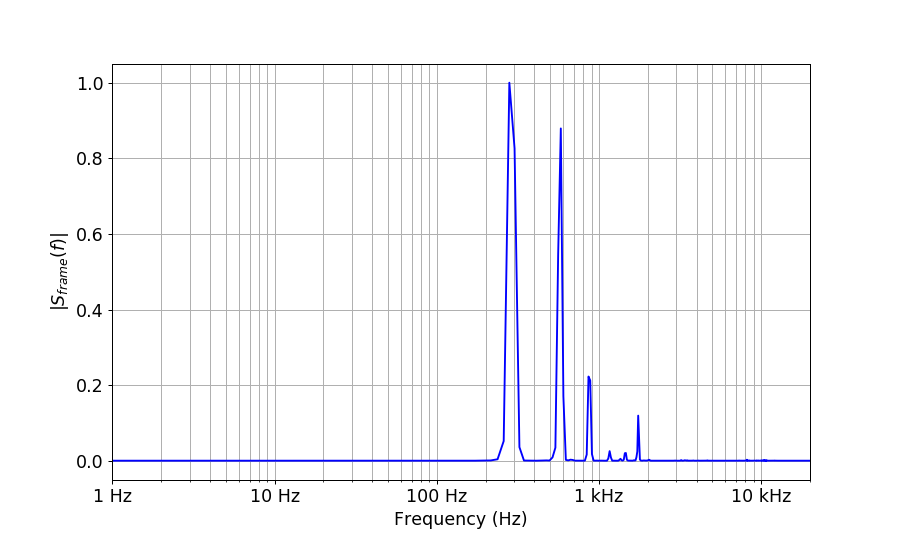

In [123]:
num_frame = 25
mag2Slore_mat_side_norm = mag2Slore_mat_side[:,num_frame]/max(mag2Slore_mat_side[:,num_frame])

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6)) 
fig.subplots_adjust(hspace=0.75)

#figura 1, ax1
ax1.plot(np.real(freqs_side[:,num_frame]), mag2Slore_mat_side_norm, "b") # plotting the positive fft spectrum
ax1.set_xscale('log')
ax1.axis([1, 20000, -0.05, 1.05])
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('$|S_{frame}(f)|$')
ax1.grid(True, which="both", ls="-")
plt.rcParams.update({'font.size': 14})
# Se define para valores en Hz inmediatamente con este formato predefinido
ax1.xaxis.set_major_formatter(EngFormatter(unit='Hz'))

<IPython.core.display.Javascript object>


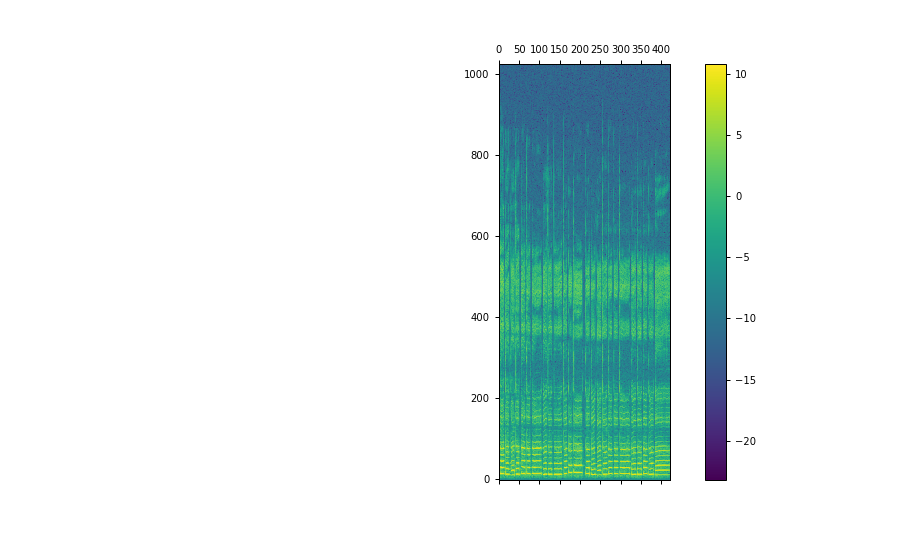

In [146]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

im = ax.matshow(np.log(mag2Slore_mat_side), origin='lower')
plt.pcolor(np.log(mag2Slore_mat_side))
plt.colorbar()
plt.rcParams.update({'font.size': 6})

In [138]:
plt.imshow(np.log(mag2Slore_mat_side), origin='lower', cmap=plt.cm.hot)
plt.colorbar()
plt.show()

In [126]:
plt.imshow(np.flipud(np.log(mag2Slore_mat_side)), cmap='gray', origin='lower')